In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

# Preaparing Data

The dataset has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).


In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb_sample/data_save.pkl'),
 PosixPath('/home/ubuntu/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

In [7]:
data_lm.save()

In [8]:
data = load_data(path)

# Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

* we need to take care of punctuation
* some words are contractions of two different words, like isn't or don't
* we may need to clean some parts of our texts, if there's HTML code for instance

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols:

* the "'s" are grouped together in one token
* the contractions are separated like this: "did", "n't"
* content has been cleaned for any HTML symbol and lower cased
* there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

# Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from `ids` to tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos `(for int to string).


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
print(data.train_ds[0][0])

xxbos i had heard good things about this film and was , you guessed it , a bit disappointed . xxmaj reese xxmaj xxunk is as xxunk surprisingly good , surprisingly confident , at a young age ; really all the ( small ) cast are quite solid , in their simple 50s xxmaj american setting . xxmaj the reason i did n't rate this film higher is mainly that towards the end , the xxunk shown by the older sister did n't seem so real and this pulled me out of the film a bit . xxmaj perhaps we are expected to fill in the plot , or perhaps the film needed to be a bit longer . xxmaj maureen 's character is quite underdeveloped i think . xxmaj it is understandable that xxmaj dani ( xxmaj reese xxup w. , the younger ) would be traumatised and angry , but why is her sister shown to be more upset ? xxmaj because she 's a few years older ? xxmaj has n't the end rather xxunk the rest of the film ? xxmaj the pacing of the movie makes it seem that xxmaj maureen and xxmaj court have only just met , when he gets

In [12]:
# But underlying numbers is all data

data.train_ds[0][0].data[:10]

array([  2,  18,  84, 595,  68, 208,  56,  20,  31,  11])

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps.

In [13]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

# Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here

In [14]:
bs=48

In [15]:
# grab full data set

path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/README'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/unsup'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/test'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/models'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_clas')]

In [16]:
(path/'train').ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/train/pos'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/neg'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/labeledBow.feat')]

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an unsup folder on top of train and test that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [17]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of TextDataBunch for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.


In [18]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,"prefer the xxmaj turkish one cause combines lots of good things ( characters , script etc ) and cause as a curious xxmaj greek i 'd love to see the xxmaj turkish point of view ... with this one u can see the common cultural background of modern xxmaj greece and xxmaj turkey . xxmaj this xxup tv series was really a good surprise for me . i am addicted"
1,. i agree wholeheartedly with all the comments listed . i remember watching this series on xxup bbc 2 in the early 1970s and was absolutely captivated . xxmaj it brought the novel to life in the most magical way . xxmaj at that time i was studying xxmaj jane xxmaj eyre as a text for ' o ' level xxmaj english xxmaj literature and it made studying the novel
2,"the giggles subside , you realize that it is so true . \n \n xxmaj the obvious strength of this film is the writing . xxmaj but beyond that , xxmaj smith establishes himself as a director that can get a performance out of his actors . xxmaj almost every major character in here is so well done that you think they had 20 attempts to get it perfect"
3,"to put in it , or maybe their girlfriends could act and refused . xxmaj we 'll never know . \n \n xxmaj if you heed my warning you will steer clear of this garbage ! \n \n xxbos xxmaj while the lead actress is fine , the rewrites are terrible . xxmaj terrible . xxmaj the story line changes . xxmaj political preferences or social concepts are"
4,such a way that look completely underwhelming ) and i think one can tell that most of the money went to xxmaj furlong instead of proper make - up effects xxunk our desire to see these characters die in a properly horrible manner . xxmaj we are n't even given any nudity as i guess these girls were too prudish to bother flashing us some skin for xxunk ourselves through


In [20]:
# RNN behind the scenes
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


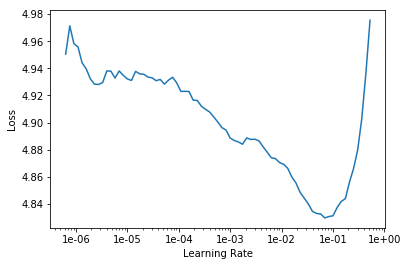

In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
doc(fit_one_cycle)

fit_one_cycle [source] fit_one_cycle ( learn : Learner , cyc_len : int , max_lr : Union [ float , Collection [ float ], slice ]= slice(None, 0.003, None) , moms : Point = (0.95, 0.85) , div_factor : float = 25.0 , pct_start : float = 0.3 , final_div : float = None , wd : float = None , callbacks : Optional [ Collection [ Callback ]]= None , tot_epochs : int = None , start_epoch : int = 1 ) 
 
 Fit a model following the 1cycle policy. 
 Show in docs

In [24]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.219234,4.055789,0.293502,1:27:33


In [25]:
learn.save('fit_head')

In [26]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [27]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
